In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df_red = pd.read_csv ('winequality-red.csv')
df_white = pd.read_csv ('winequality-white.csv')

In [4]:
df_red.info()
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                 

In [9]:
col_name_red = df_red.iloc[0, 0]
print(col_name_red)

7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [11]:
# Assuming `df_red` and `df_white` are the DataFrame variables

# The first column can be accessed using iloc[:, 0] since it's the only column
df_red = df_red.iloc[:, 0].str.split(';', expand=True)
df_white = df_white.iloc[:, 0].str.split(';', expand=True)

# Now that we have split the single column into multiple columns,
# we can assign the proper column names to each DataFrame
columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

df_red.columns = columns
df_white.columns = columns

# Convert the string values to their appropriate types, e.g., floats for the measurements and int for the quality score
df_red = df_red.apply(pd.to_numeric, errors='coerce')
df_white = df_white.apply(pd.to_numeric, errors='coerce')

# Check the first value of the second column (volatile acidity) in the red wine DataFrame
first_value_volatile_acidity_red = df_red.iloc[0, 1]

0.7


In [12]:
df_red.info()
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [14]:
# Summary statistics for the red wine dataset
print(df_red.describe())

# Summary statistics for the white wine dataset
print(df_white.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

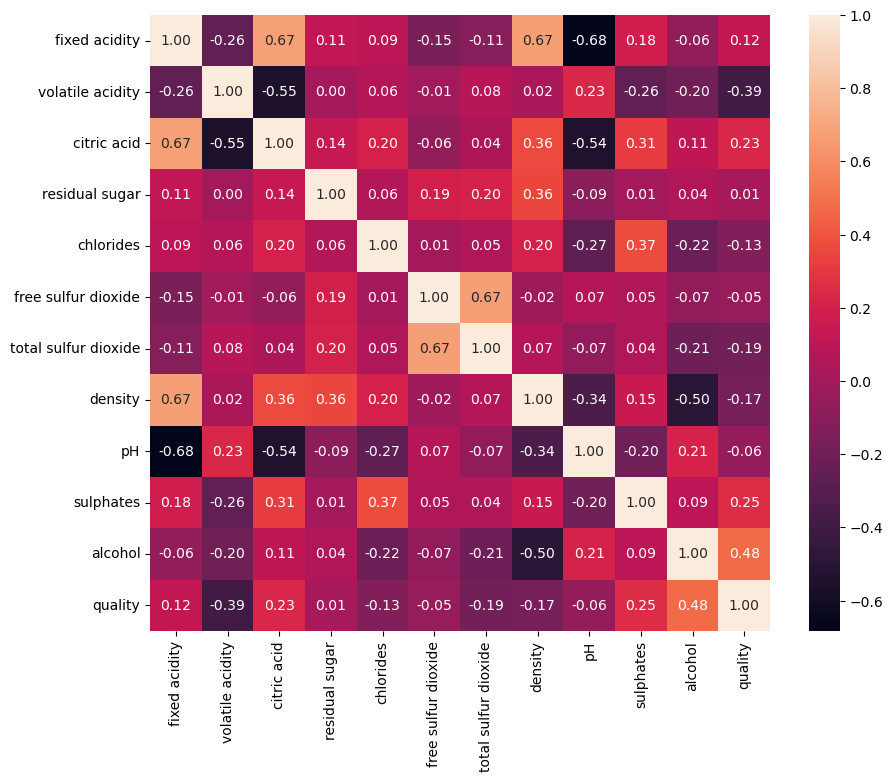

In [15]:
# Correlation matrix heatmap for the red wine dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_red.corr(), annot=True, fmt=".2f")
plt.show()

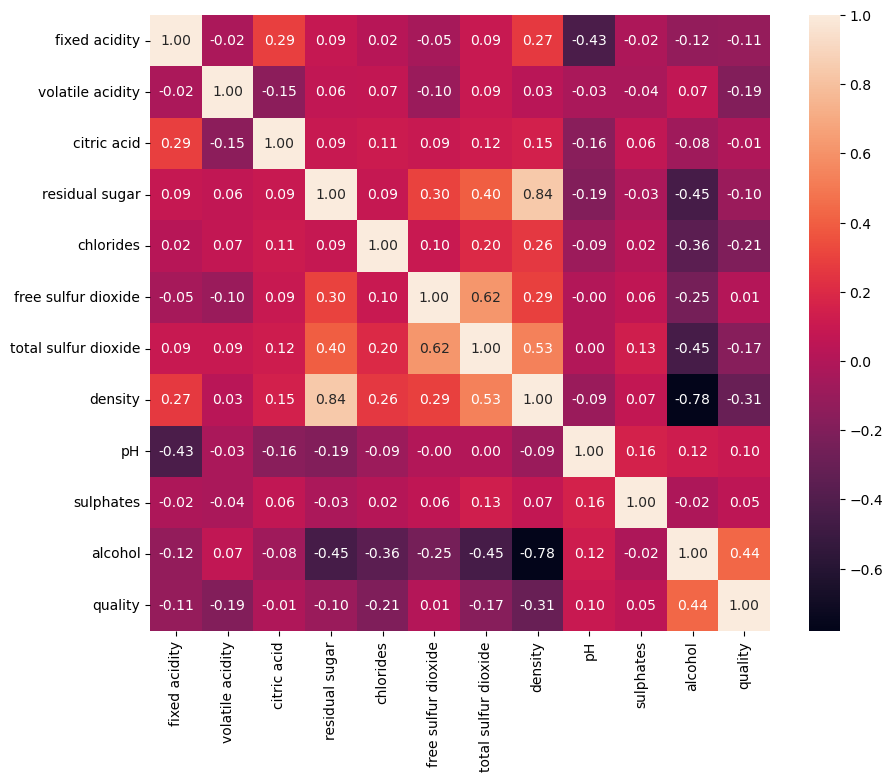

In [16]:
# Correlation matrix heatmap for the white wine dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_white.corr(), annot=True, fmt=".2f")
plt.show()

In [17]:
# Split the data into features and target
X_red = df_red.iloc[:, :-1]  # All columns except 'quality'
y_red = df_red['quality']
X_white = df_white.iloc[:, :-1]  # All columns except 'quality'
y_white = df_white['quality']

In [20]:
# Scale features (standardization)
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)

In [21]:
# Split the red wine data
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(
    X_red_scaled, y_red, test_size=0.2, random_state=42)

# Split the white wine data
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(
    X_white_scaled, y_white, test_size=0.2, random_state=42)

In [22]:
# Initialize the model
model_red = LinearRegression()
model_white = LinearRegression()

In [23]:
# Train the model for red wine
model_red.fit(X_red_train, y_red_train)

# Train the model for white wine
model_white.fit(X_white_train, y_white_train)

LinearRegression()

In [24]:
# Predictions for red wine
y_red_pred = model_red.predict(X_red_test)

# Predictions for white wine
y_white_pred = model_white.predict(X_white_test)

# Evaluate the performance for red wine
mse_red = mean_squared_error(y_red_test, y_red_pred)
r2_red = r2_score(y_red_test, y_red_pred)

# Evaluate the performance for white wine
mse_white = mean_squared_error(y_white_test, y_white_pred)
r2_white = r2_score(y_white_test, y_white_pred)

print("Red Wine - Mean Squared Error:", mse_red)
print("Red Wine - R-squared:", r2_red)

print("White Wine - Mean Squared Error:", mse_white)
print("White Wine - R-squared:", r2_white)

Red Wine - Mean Squared Error: 0.39002514396395493
Red Wine - R-squared: 0.4031803412796219
White Wine - Mean Squared Error: 0.5690247717229252
White Wine - R-squared: 0.26527500421791583
